In [2]:
! pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [6]:
# Load Dataset
news = pd.read_csv('/content/drive/My Drive/Capstone_Project_Three/Data/news_classification_Feb29_24.csv')
test = pd.read_csv('/content/drive/My Drive/Capstone_Project_Three/Data/test_set_Feb29_2024.csv')

In [7]:
X_train, X_val, y_train, y_val = train_test_split(news.text, news.label, test_size=0.1, random_state=42, stratify=news.label)
X_test = test.text
y_test = test.label

In [8]:
model = SentenceTransformer("all-MiniLM-L6-v2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [9]:
X_train = model.encode(X_train.tolist())
X_val = model.encode(X_val.tolist())
X_test = model.encode(X_test.tolist())

In [10]:
# initiate the model
lr_classifier = LogisticRegression()
# fit the model
lr_classifier.fit(X_train, y_train)

LogisticRegression()

In [11]:
y_val_pred = lr_classifier.predict(X_val)
accuracy_val = metrics.accuracy_score(y_val, y_val_pred)
accuracy_val

0.9344873501997337

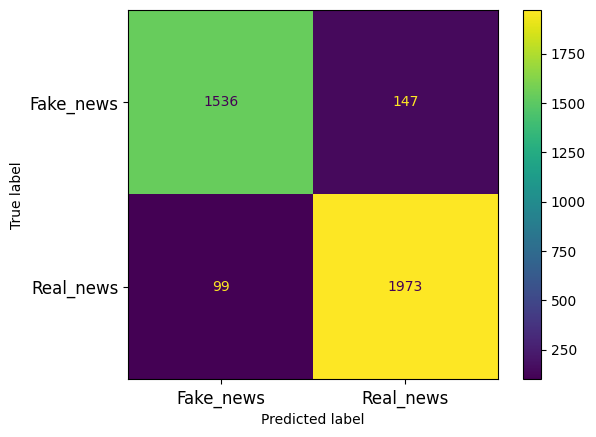

In [14]:
cm = metrics.confusion_matrix(y_val, y_val_pred, labels = lr_classifier.classes_)
fig, ax = plt.subplots()
display_cm = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                    display_labels = ['Fake_news', 'Real_news'])

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Fake_news', 'Real_news'], fontsize = 12)
ax.set_yticklabels(labels = ['Fake_news', 'Real_news'], fontsize = 12)

display_cm.plot(ax = ax)
plt.show()

In [12]:
y_test_pred = lr_classifier.predict(X_test)
accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
accuracy_test

0.84

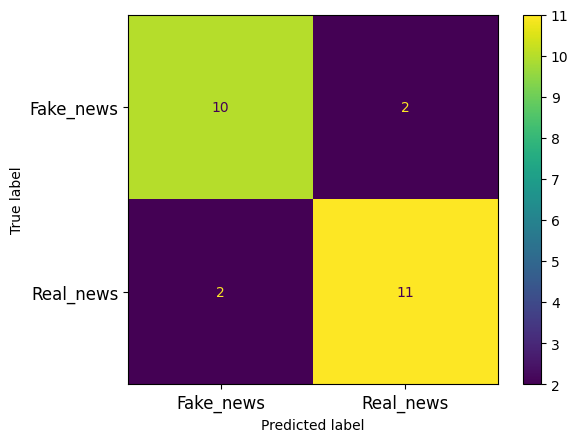

In [13]:
cm = metrics.confusion_matrix(y_test, y_test_pred, labels = lr_classifier.classes_)
fig, ax = plt.subplots()
display_cm = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                    display_labels = ['Fake_news', 'Real_news'])

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Fake_news', 'Real_news'], fontsize = 12)
ax.set_yticklabels(labels = ['Fake_news', 'Real_news'], fontsize = 12)

display_cm.plot(ax = ax)
plt.show()